In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
from IPython import display
import sys

print("2D heat equation solver")

plate_length = 100
max_iter_time = 50
alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2) # gamma seems to not change, even if i change alpha
print(delta_t, gamma)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 0.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

# bounds = [(45,55, 45,55), (20,30, 20,30), (70,80, 70,80), (20,30, 70,80), (70,80, 20,30)]
bounds = [(45, 55, 45, 55)]
for lbx, ubx, lby, uby in bounds:
    u[:, lbx:ubx, lby:uby] = 100.0

def calculate(u):
    for k in tqdm(range(0, max_iter_time-1, 1)):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                good = True
                for lbx, ubx, lby, uby in bounds:
                    if (i > lbx and i < ubx-1) and (j > lby and j < uby-1):
                        good = False
                if good:
                    u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

2D heat equation solver
0.125 0.25


In [2]:
# Do the calculation here
u = calculate(u)

100%|██████████| 49/49 [00:01<00:00, 43.08it/s]


In [3]:
fig, ax = plt.subplots(facecolor='white')
init = ax.pcolormesh(u[0], cmap=plt.cm.jet, vmin=0, vmax=100)
fig.colorbar(init)

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    ax.set_title(f"Temperature at t = {k*delta_t:.3f} unit time")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # This is to plot u_k (u at time-step k)
    im = ax.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    return ax

def animate(k):
    plotheatmap(u[k], k)

In [4]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=120, bitrate=1000)

In [7]:
anim = animation.FuncAnimation(fig=fig, func=animate, frames=tqdm(range(max_iter_time), file=sys.stdout))
#anim = animation.FuncAnimation(fig=fig, func=animate, frames=tqdm(range(10), initial=1, position=0), interval=200, blit=False)
save_file = "heat_diffusion.gif"
anim.save(save_file, writer=writer)

 70%|███████   | 35/50 [00:27<00:11,  1.27it/s] 


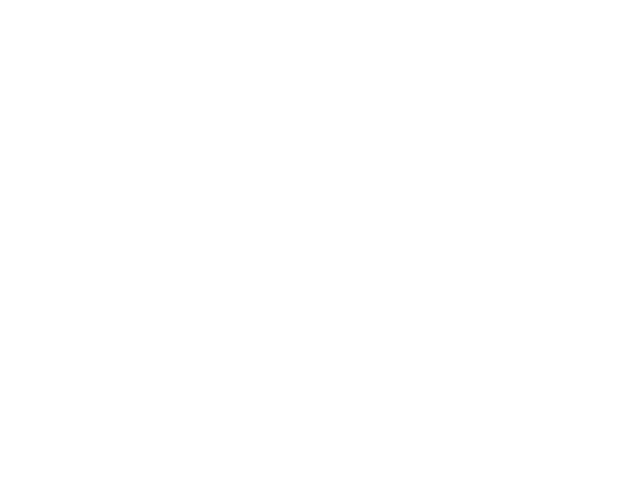

 70%|███████   | 35/50 [00:18<00:00, 191.28it/s]

In [6]:
display.Image(filename=save_file)